In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
#np.set_printoptions(suppress=True)
#%matplotlib inline 

In [2]:
df = pd.read_excel('DHAntnn.xlsx')
df

,DU,Naphthene C5,Naphthene C6,Naphthene C7,Naphthene C8,Naphthene C9,Naphthene C10,Naphthene C11+,Napthene Poly,Parafine C4,...,Oxygenates C8,Oxygenates C9,Oxygenates C10,Oxygenates C11+,Aromatics C6,Aromatics C7,Aromatics C8,Aromatics C9,Aromatics C10,Aromatics C11+
0,22.70,5.88,1.07,0.63,0.51,0.29,0.12,0,0.00,1.88,...,0,0,0,0,0.37,11.79,6.45,9.24,8.86,1.56
1,10.45,0.35,1.48,0.69,0.52,0.33,0.16,0,0.09,2.63,...,0,0,0,0,0.41,14.28,6.72,8.09,3.97,1.09
2,11.38,0.34,1.23,0.72,0.53,0.31,0.14,0,0.00,1.20,...,0,0,0,0,0.47,18.92,4.98,6.45,3.30,0.82
3,4.47,0.32,1.38,0.64,0.48,0.30,0.19,0,0.04,2.52,...,0,0,0,0,0.35,7.35,6.18,9.22,15.75,0.42
4,11.71,14.75,1.33,0.63,0.49,0.30,0.16,0,0.08,2.12,...,0,0,0,0,0.34,12.40,5.98,7.21,3.55,0.86
5,4.50,0.22,13.33,0.52,0.41,0.23,0.11,0,0.06,2.68,...,0,0,0,0,0.33,6.06,4.85,14.86,3.34,2.09
6,7.40,0.24,0.74,7.03,0.52,0.29,0.19,0,0.02,3.41,...,0,0,0,0,0.48,19.29,6.65,5.69,2.36,0.82
7,16.00,0.80,1.58,6.85,0.60,0.06,0.08,0,0.00,1.27,...,0,0,0,0,0.18,17.27,3.79,6.12,3.05,0.23


In [5]:
Y = df.loc[:, 'DU']
Y

0    22.70
1    10.45
2    11.38
3     4.47
4    11.71
5     4.50
6     7.40
7    16.00
Name: DU, dtype: float64

In [6]:
X = df.drop(['DU'], axis=1)
X

,Naphthene C5,Naphthene C6,Naphthene C7,Naphthene C8,Naphthene C9,Naphthene C10,Naphthene C11+,Napthene Poly,Parafine C4,Parafine C5,...,Oxygenates C8,Oxygenates C9,Oxygenates C10,Oxygenates C11+,Aromatics C6,Aromatics C7,Aromatics C8,Aromatics C9,Aromatics C10,Aromatics C11+
0,5.88,1.07,0.63,0.51,0.29,0.12,0,0.00,1.88,15.10,...,0,0,0,0,0.37,11.79,6.45,9.24,8.86,1.56
1,0.35,1.48,0.69,0.52,0.33,0.16,0,0.09,2.63,9.42,...,0,0,0,0,0.41,14.28,6.72,8.09,3.97,1.09
2,0.34,1.23,0.72,0.53,0.31,0.14,0,0.00,1.20,12.96,...,0,0,0,0,0.47,18.92,4.98,6.45,3.30,0.82
3,0.32,1.38,0.64,0.48,0.30,0.19,0,0.04,2.52,10.81,...,0,0,0,0,0.35,7.35,6.18,9.22,15.75,0.42
4,14.75,1.33,0.63,0.49,0.30,0.16,0,0.08,2.12,8.44,...,0,0,0,0,0.34,12.40,5.98,7.21,3.55,0.86
5,0.22,13.33,0.52,0.41,0.23,0.11,0,0.06,2.68,6.85,...,0,0,0,0,0.33,6.06,4.85,14.86,3.34,2.09
6,0.24,0.74,7.03,0.52,0.29,0.19,0,0.02,3.41,9.37,...,0,0,0,0,0.48,19.29,6.65,5.69,2.36,0.82
7,0.80,1.58,6.85,0.60,0.06,0.08,0,0.00,1.27,11.31,...,0,0,0,0,0.18,17.27,3.79,6.12,3.05,0.23


In [7]:
#Subtract each column by its own mean. As a result, the mean of each column becomes zero.
X_standard = X - X.mean()  
X_standard

,Naphthene C5,Naphthene C6,Naphthene C7,Naphthene C8,Naphthene C9,Naphthene C10,Naphthene C11+,Napthene Poly,Parafine C4,Parafine C5,...,Oxygenates C8,Oxygenates C9,Oxygenates C10,Oxygenates C11+,Aromatics C6,Aromatics C7,Aromatics C8,Aromatics C9,Aromatics C10,Aromatics C11+
0,3.0175,-1.6975,-1.58375,0.0025,0.02625,-0.02375,0.0,-0.03625,-0.33375,4.5675,...,0.0,0.0,0.0,0.0,0.00375,-1.63,0.75,0.88,3.3375,0.57375
1,-2.5125,-1.2875,-1.52375,0.0125,0.06625,0.01625,0.0,0.05375,0.41625,-1.1125,...,0.0,0.0,0.0,0.0,0.04375,0.86,1.02,-0.27,-1.5525,0.10375
2,-2.5225,-1.5375,-1.49375,0.0225,0.04625,-0.00375,0.0,-0.03625,-1.01375,2.4275,...,0.0,0.0,0.0,0.0,0.10375,5.50,-0.72,-1.91,-2.2225,-0.16625
3,-2.5425,-1.3875,-1.57375,-0.0275,0.03625,0.04625,0.0,0.00375,0.30625,0.2775,...,0.0,0.0,0.0,0.0,-0.01625,-6.07,0.48,0.86,10.2275,-0.56625
4,11.8875,-1.4375,-1.58375,-0.0175,0.03625,0.01625,0.0,0.04375,-0.09375,-2.0925,...,0.0,0.0,0.0,0.0,-0.02625,-1.02,0.28,-1.15,-1.9725,-0.12625
5,-2.6425,10.5625,-1.69375,-0.0975,-0.03375,-0.03375,0.0,0.02375,0.46625,-3.6825,...,0.0,0.0,0.0,0.0,-0.03625,-7.36,-0.85,6.50,-2.1825,1.10375
6,-2.6225,-2.0275,4.81625,0.0125,0.02625,0.04625,0.0,-0.01625,1.19625,-1.1625,...,0.0,0.0,0.0,0.0,0.11375,5.87,0.95,-2.67,-3.1625,-0.16625
7,-2.0625,-1.1875,4.63625,0.0925,-0.20375,-0.06375,0.0,-0.03625,-0.94375,0.7775,...,0.0,0.0,0.0,0.0,-0.18625,3.85,-1.91,-2.24,-2.4725,-0.75625


In [8]:
#When covariance is positive, it means, if one variable increases, the other increases as well. 
#The opposite true when covariance is negative.
#it becomes a square matrix with the same number of rows and columns.
df_cov = X_standard.cov()
print(df.shape)
df_cov.head()

(8, 51)


,Naphthene C5,Naphthene C6,Naphthene C7,Naphthene C8,Naphthene C9,Naphthene C10,Naphthene C11+,Napthene Poly,Parafine C4,Parafine C5,...,Oxygenates C8,Oxygenates C9,Oxygenates C10,Oxygenates C11+,Aromatics C6,Aromatics C7,Aromatics C8,Aromatics C9,Aromatics C10,Aromatics C11+
Naphthene C5,26.810307,-4.530664,-4.246468,-0.026379,0.082204,0.010275,0.0,0.058882,-0.544511,-0.564264,...,0.0,0.0,0.0,0.0,-0.064204,-3.075886,1.045543,-1.894229,-1.530464,0.129711
Naphthene C6,-4.530664,18.283136,-3.107661,-0.165236,-0.067304,-0.062418,0.0,0.043832,0.702739,-6.413293,...,0.0,0.0,0.0,0.0,-0.079182,-13.017357,-1.597714,11.282857,-3.615607,1.858389
Naphthene C7,-4.246468,-3.107661,8.515170,0.095511,-0.155302,-0.013673,0.0,-0.047441,0.238770,-0.292054,...,0.0,0.0,0.0,0.0,-0.059241,8.972929,-0.815071,-4.559329,-5.081396,-0.843384
Naphthene C8,-0.026379,-0.165236,0.095511,0.002850,-0.002132,-0.000504,0.0,-0.000996,-0.020432,0.071079,...,0.0,0.0,0.0,0.0,-0.001211,0.208900,-0.014514,-0.131714,-0.051893,-0.023268
Naphthene C9,0.082204,-0.067304,-0.155302,-0.002132,0.007598,0.002555,0.0,0.001259,0.026798,0.004004,...,0.0,0.0,0.0,0.0,0.006916,-0.052914,0.074900,0.010471,0.096518,0.014516


In [9]:
#Eigen values and Eigen vectors represent the amount of variance explained and how the columns are related to each other.
#The length of Eigenvectors is one.
from numpy.linalg import eig
eigvalues, eigvectors = eig(df_cov)
print(eigvalues[:10])
print(eigvectors.shape)

[ 5.38266016e+01+0.00000000e+00j  3.59583844e+01+0.00000000e+00j
  2.73431810e+01+0.00000000e+00j  1.35102951e+01+0.00000000e+00j
  1.00941372e+01+0.00000000e+00j  5.69328439e+00+0.00000000e+00j
  2.62234130e+00+0.00000000e+00j -3.40289528e-15+3.83478027e-15j
 -3.40289528e-15-3.83478027e-15j -3.23621151e-15+0.00000000e+00j]
(50, 50)


In [10]:
#Principal Component Features by taking dot product of eigen vector and standardized columns
#this is the same as the pca matrix on DISI PCA file
X_pca = np.dot(X_standard, eigvectors)
df_pca_calc = pd.DataFrame(X_pca) 
df_pca_calc.round(2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-3.134417+0.000000j,6.475179+0.000000j,3.803858+0.000000j,1.308246+0.000000j,6.318777+0.000000j,0.907609+0.000000j,0.231633+0.000000j,-1.578055e-16+3.617534e-16j,-1.578055e-16-3.617534e-16j,-5.004294e-16+0.000000e+00j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
1,1.381400+0.000000j,-2.960719+0.000000j,1.553205+0.000000j,4.387112+0.000000j,-1.203072+0.000000j,-2.511098+0.000000j,2.842896+0.000000j,7.547944e-16-4.770957e-17j,7.547944e-16+4.770957e-17j,-1.722478e-15+0.000000e+00j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
2,5.519640+0.000000j,-1.453344+0.000000j,1.600376+0.000000j,4.834175+0.000000j,-0.934592+0.000000j,-0.822134+0.000000j,-3.017234+0.000000j,4.291687e-16-1.416366e-15j,4.291687e-16+1.416366e-15j,3.182846e-15+0.000000e+00j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
3,-7.826678+0.000000j,1.568389+0.000000j,8.337246+0.000000j,-3.325440+0.000000j,-3.913383+0.000000j,0.162351+0.000000j,-0.307674+0.000000j,-2.185742e-16+1.417073e-15j,-2.185742e-16-1.417073e-15j,-7.221245e-16+0.000000e+00j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
4,-1.268795+0.000000j,10.25294+0.00000j,-8.257656+0.000000j,-0.502219+0.000000j,-2.348432+0.000000j,-0.801303+0.000000j,0.000544+0.000000j,7.786068e-16-1.365210e-15j,7.786068e-16+1.365210e-15j,-1.695436e-15+0.000000e+00j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
5,-11.440677+0.000000j,-8.804042+0.000000j,-5.781544+0.000000j,-0.144026+0.000000j,1.288534+0.000000j,0.610009+0.000000j,-0.469030+0.000000j,-2.634827e-15+3.251017e-16j,-2.634827e-15-3.251017e-16j,-3.285567e-15+0.000000e+00j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
6,8.051123+0.000000j,-1.863257+0.000000j,-0.779996+0.000000j,-0.328471+0.000000j,-1.278341+0.000000j,4.968587+0.000000j,0.880939+0.000000j,-5.943181e-16+4.710134e-16j,-5.943181e-16-4.710134e-16j,3.836403e-15+0.000000e+00j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
7,8.718404+0.000000j,-3.215147+0.000000j,-0.475488+0.000000j,-6.229378+0.000000j,2.070508+0.000000j,-2.514022+0.000000j,-0.162076+0.000000j,-1.817719e-15-1.273186e-15j,-1.817719e-15+1.273186e-15j,1.088188e-15+0.000000e+00j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j


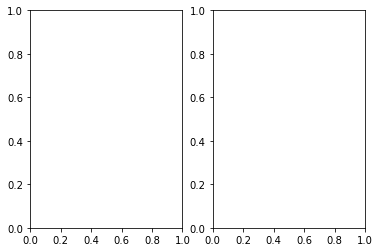

In [11]:
ax = plt.subplot(121)
ax2 = plt.subplot(122)

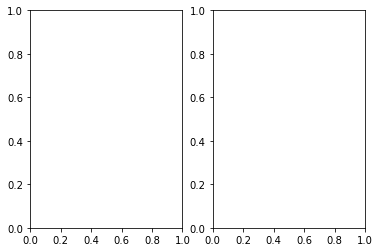

In [12]:
fig, (ax, ax2) = plt.subplots(ncols=2)

In [13]:
all_axes = plt.gcf().get_axes()
ax = all_axes[0]

IndexError: list index out of range

<Figure size 432x288 with 0 Axes>